In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/Applications/archieve/education.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
print("No. Of Rows: ", df.shape[0])
print("No. Of Columns: ", df.shape[1])

No. Of Rows:  500
No. Of Columns:  9


In [5]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


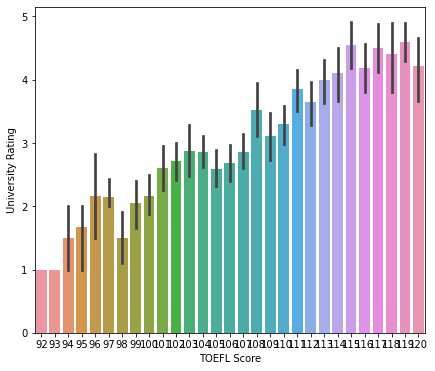

In [9]:
plt.figure(figsize=(7,6))
sns.barplot(x=df['TOEFL Score'],y=df['University Rating'],data=df)
plt.show()

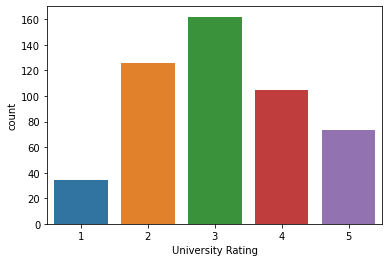

In [10]:
sns.countplot(x='University Rating',data=df)
plt.show()

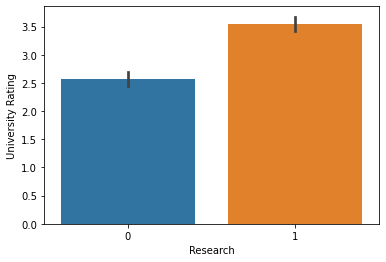

In [11]:
sns.barplot(x='Research',y='University Rating',data=df)
plt.show()

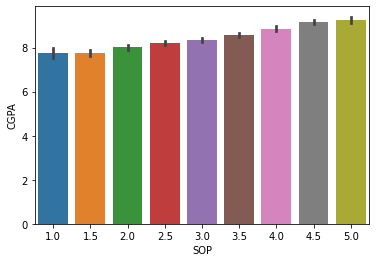

In [12]:
sns.barplot(data=df,x='SOP',y='CGPA')
plt.show()

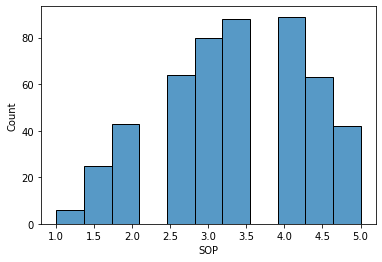

In [13]:
sns.histplot(df['SOP'])
plt.show()

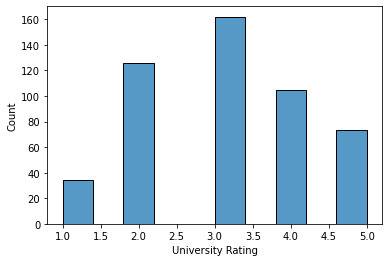

In [14]:
sns.histplot(df['University Rating'])
plt.show()

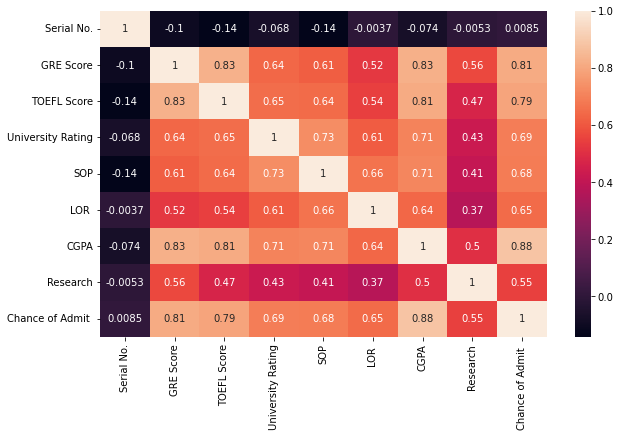

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
data_missing= (df.isna().sum()/df.shape[0])*100
data_missing
data_missing.sort_values(ascending=False)

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [17]:
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())
df['Chance of Admit'] = df['GRE Score'].fillna(df['GRE Score'].mean())

In [18]:
df['Research'] = df['Research'].fillna(df['Research'].mode()[0])

In [19]:
df['GRE Score']= df['GRE Score'].fillna(df['GRE Score'].median())

# Detecting Outliers

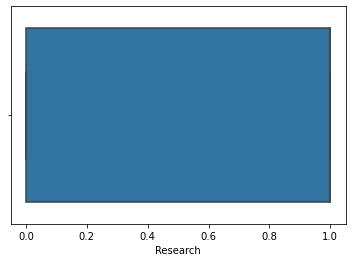

In [20]:
sns.boxplot(x=df['Research'],data=df)
plt.show()

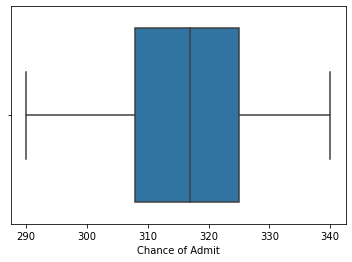

In [21]:
sns.boxplot(x='Chance of Admit',data=df)
plt.show()

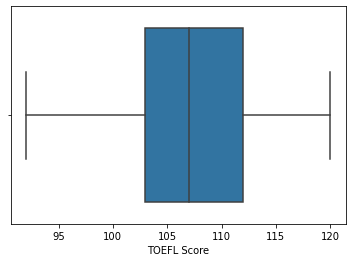

In [22]:
sns.boxplot(x='TOEFL Score',data=df)
plt.show()

# Detecting outliers using the Z-scores

In [23]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

# Detecting outliers using the Inter Quantile Range(IQR)

In [24]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers


# Feature Engineering

In [25]:
X= df.iloc[:,0:4].values
y=df.iloc[:,-4].values

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=2)
X_train.shape,X_test.shape

((400, 4), (100, 4))

In [27]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit
0,-1.728590,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107,1.819238
1,-1.721662,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349,0.667148
2,-1.714734,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340,-0.041830
3,-1.707806,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039,0.489904
4,-1.700877,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797,-0.219074


In [28]:
from sklearn.preprocessing import MinMaxScaler

scale= MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit
0,-1.728590,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107,1.819238
1,-1.721662,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349,0.667148
2,-1.714734,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340,-0.041830
3,-1.707806,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039,0.489904
4,-1.700877,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797,-0.219074


# Model Building

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=3)
X_train.shape,X_test.shape

((350, 4), (150, 4))

In [30]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [31]:
predict=model.predict(X_test)

In [32]:
predict[:5]

array([9.53345608, 7.90366573, 7.80498377, 7.69066219, 9.04330948])

In [33]:
model.score(X_test,y_test)

0.7689434507787709

In [34]:
print(model.coef_)

[0.00019413 0.02494471 0.02571831 0.12652735]


In [35]:
list(zip(df,model.coef_))

[('Serial No.', 0.00019413202557604184),
 ('GRE Score', 0.024944714224865584),
 ('TOEFL Score', 0.02571830794187168),
 ('University Rating', 0.1265273516734855)]

# Performing Ridge And Lasso Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [37]:
# Ridge

r= Ridge(alpha=0.1)
r.fit(X_train,y_train)

Ridge(alpha=0.1)

In [38]:
y_predict= r.predict(X_test)

In [39]:
# Lasso 

l= Lasso(alpha=0.01)
l.fit(X_train,y_train)

Lasso(alpha=0.01)

In [40]:
y_p=l.predict(X_test)

# Testing the assumptions of the linear regression model 

In [41]:
y_train = np.array(y_train)

In [42]:
import statsmodels.api as sm
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     273.4
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.40e-105
Time:                        11:37:16   Log-Likelihood:                -71.598
No. Observations:                 350   AIC:                             153.2
Df Residuals:                     345   BIC:                             172.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5128      0.569     -4.417      0.0

In [43]:
results.predict(X_sm)

array([9.35469505, 8.37634589, 9.246484  , 8.05581601, 8.9469684 ,
       8.39406893, 8.45336958, 8.23334056, 8.99773268, 9.28569617,
       8.97482216, 8.28032388, 8.81257996, 8.40931835, 9.38106408,
       8.21786096, 8.72881324, 9.08207342, 9.09255111, 8.94731494,
       8.52943641, 8.96637324, 8.19416761, 9.57518903, 8.68692158,
       9.2026156 , 8.12641217, 9.11445468, 8.08386371, 8.44016567,
       8.05745838, 7.95138636, 8.12641804, 7.70503089, 9.51655192,
       8.4306557 , 8.80646942, 7.71391924, 8.65805837, 9.19563272,
       8.06420248, 8.20481532, 7.90495676, 9.57372549, 9.41033316,
       9.37087633, 8.1900009 , 9.31040546, 8.89374962, 9.36194626,
       9.64593466, 9.26770185, 9.45006839, 9.6317739 , 7.35484934,
       7.72440574, 9.00733553, 8.9705567 , 8.04019507, 9.27181111,
       7.73818868, 8.47487357, 9.69232678, 8.1882336 , 7.72052853,
       8.99364753, 9.10504683, 8.99002149, 8.82626501, 8.87440389,
       8.54121894, 8.41350919, 8.46276462, 8.4460183 , 8.61593

In [44]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('GRE Score')]
y = df["GRE Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              GRE Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.748e+31
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:37:16   Log-Likelihood:                 13169.
No. Observations:                 400   AIC:                        -2.632e+04
Df Residuals:                     390   BIC:                        -2.628e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028   6.17e-17  -4.59e+13      0.0

# Multicollinearity and implementation

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,6.15
7,Chance of Admit,6.14
8,Chance of Admit,4.43
1,TOEFL Score,4.21
3,SOP,2.78
2,University Rating,2.61
4,LOR,2.07
6,Research,1.51
0,Serial No.,1.10


In [47]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.326e+31
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:37:16   Log-Likelihood:                 13311.
No. Observations:                 400   AIC:                        -2.660e+04
Df Residuals:                     391   BIC:                        -2.657e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0028   4.32e-1

In [48]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    Chance of Admit 
VIF                     4.77
Name: 0, dtype: object
Current adj.R2 1.0
Features removed: 1
List of features removed: ['year']


In [49]:
print(vif)
print(sm_model.summary())

            Features   VIF
0   Chance of Admit   4.77
1    Chance of Admit  4.22
2        TOEFL Score  4.04
3                SOP  2.74
4  University Rating  2.57
5               LOR   2.05
6           Research  1.51
7         Serial No.  1.09
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.771e+30
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:37:16   Log-Likelihood:                 12889.
No. Observations:                 400   AIC:                        -2.576e+04
Df Residuals:                     392   BIC:                        -2.573e+04
Df Model:                           7                                         
Covariance Type:            nonrobust         

In [50]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [51]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

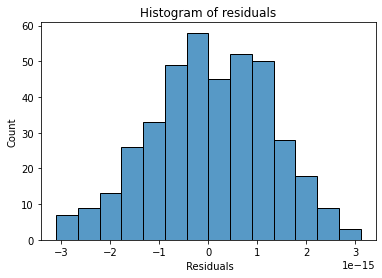

In [52]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.show()

# Test for Homoscedasticity

# Using Goldfeld Quandt Test to check homoskedacity

In [53]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', 28.823925493668924), ('p-value', 2.023597902596281e-87)]

# Normality of residuals

In [54]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

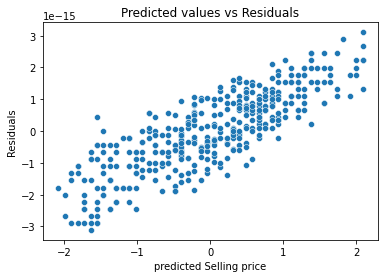

In [55]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

# Model performance evaluation 

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=2)

In [57]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [58]:
pred=model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [60]:
y_test.ravel()

array([ 1.46474861, -0.48494097, -1.01667449,  2.08510438, -1.81427477,
       -0.13045196,  0.66714832, -0.66218548, -1.10529675, -1.01667449,
       -0.75080773, -1.45978576, -1.63703027, -1.193919  , -1.10529675,
       -0.48494097, -1.90289703, -1.01667449,  0.93301508,  1.11025959,
        1.11025959, -0.0418297 , -0.30769646, -2.34600829,  0.75577058,
        1.55337086,  0.1354148 ,  0.1354148 , -1.10529675, -0.39631872,
        0.48990382,  1.90785987, -1.63703027,  1.73061537, -0.39631872,
       -0.0418297 ,  0.31265931, -0.48494097, -1.37116351, -0.75080773,
        0.40128156,  1.73061537,  1.02163734,  2.08510438,  0.31265931,
       -0.39631872,  1.37612635,  1.55337086,  1.37612635,  0.40128156,
       -1.63703027, -1.45978576,  1.2875041 ,  0.22403706,  0.1354148 ,
       -1.45978576,  1.90785987, -0.0418297 ,  1.81923762,  0.66714832,
       -0.83942999, -0.0418297 , -0.39631872,  2.08510438, -0.39631872,
       -0.66218548, -0.0418297 ,  0.93301508, -0.75080773,  0.31

In [61]:
print('MAE',mean_absolute_error(y_test,pred))

MAE 3.281402927157728e-16


In [62]:
print('MSE',mean_squared_error(y_test,pred))

MSE 1.780450011213085e-31


In [63]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

RMSE 4.2195379026773593e-16


In [64]:
print('MSE', r2_score(y_test,pred))
r2=r2_score(y_test,pred)

MSE 1.0


In [65]:
# Adjusted R2 Score

1-((1-r2)*(40-1)/(40-1-1))


1.0